In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor,XGBRFRegressor

In [4]:
df=pd.read_csv("C:\\Users\\Manis\\OneDrive\\Desktop\\Life Expectancy Data.csv")

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
missing_values_percentage

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [15]:
df.rename(columns=lambda x: x.replace(' ', ''), inplace=True)

Skewness: -0.638605


<Axes: >

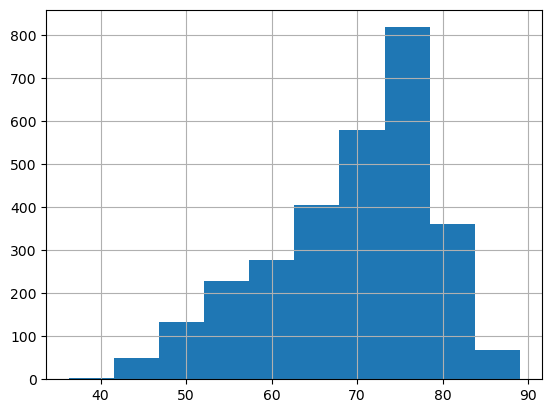

In [16]:
print("Skewness: %f" % df['Lifeexpectancy'].skew())
df['Lifeexpectancy'].hist()

In [17]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Lifeexpectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
AdultMortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infantdeaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentageexpenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-fivedeaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<Axes: ylabel='count'>

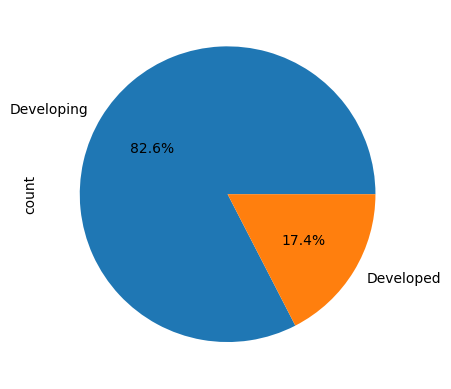

In [18]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: >

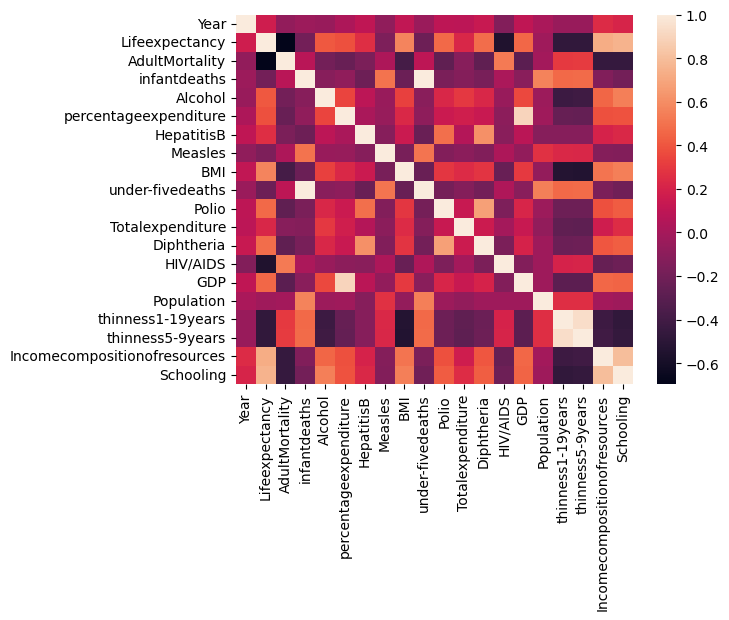

In [36]:
corr = numeric_data.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [37]:
!pip install pycountry-convert

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
    --------------------------------------- 0.1/6.3 MB 3.6 MB/s eta 0:00:02
   - -------------------------------------- 0.3/6.3 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.3 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/6.3 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.5/6.3 MB 2.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.3 MB 2.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.6/6.3 MB 2.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.3 MB 2.0 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.3 MB 2.0 MB/s eta 0:00:03
   ----- ---------------------------------- 0.8/6.3 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 0.8/6.3 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 0.9/6.3 MB 1.6 MB/s eta 0:00:04
   ----- ----------

In [38]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

In [39]:
df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)
df['Continent'] = df['Country'].apply(map_country2continent)
df.drop(columns=['Country'], inplace=True)

In [40]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

In [41]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

In [42]:
#encoding continent
continent_enc = LabelEncoder()
df_train['Continent'] = continent_enc.fit_transform(df_train['Continent'])
df_test['Continent'] = continent_enc.transform(df_test['Continent'])

#encoding year
year_enc = LabelEncoder()
df_train['Year'] = year_enc.fit_transform(df_train['Year'])
df_test['Year'] = year_enc.transform(df_test['Year'])

#encoding status
status_enc = LabelEncoder()
df_train['Status'] = status_enc.fit_transform(df_train['Status'])
df_test['Status'] = status_enc.transform(df_test['Status'])

In [43]:
def outlier_threshhold(dataframe,column,q1=0.25,q3=0.75):
    Q1=dataframe[column].quantile(q1)
    Q3=dataframe[column].quantile(q3)
    iqr=Q3-Q1
    up_limit=Q3+1.5*iqr
    low_limit=Q1-1.5*iqr
    return low_limit,up_limit

#Outlier Percentage    
def outlier_percentage(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers= [x for x in dataframe[col] if (x>up_limit) | (x<low_limit)]
    print(col)
    print("Outliers percentage:", len(outliers)/(dataframe[column].shape[0])*100,"%")
    print("-------------------------")   
#Checking Outliers 
def check_outliers(dataframe,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    outliers=(dataframe[column]>up_limit) | (dataframe[column]<low_limit)
    if outliers.any():
        return True
    else:
        return False

In [45]:
num_col=[]
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)

['Status', 'Continent']
['Year', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years', 'thinness5-9years', 'Incomecompositionofresources', 'Schooling']


In [46]:
for col in (df_train[num_col].drop(columns='Year').columns):
    outlier_percentage(df_train,col)

Lifeexpectancy
Outliers percentage: 0.5957446808510638 %
-------------------------
AdultMortality
Outliers percentage: 3.1914893617021276 %
-------------------------
infantdeaths
Outliers percentage: 11.48936170212766 %
-------------------------
Alcohol
Outliers percentage: 0.0 %
-------------------------
percentageexpenditure
Outliers percentage: 12.851063829787234 %
-------------------------
HepatitisB
Outliers percentage: 8.382978723404255 %
-------------------------
Measles
Outliers percentage: 18.425531914893618 %
-------------------------
BMI
Outliers percentage: 0.0 %
-------------------------
under-fivedeaths
Outliers percentage: 13.148936170212766 %
-------------------------
Polio
Outliers percentage: 9.446808510638299 %
-------------------------
Totalexpenditure
Outliers percentage: 1.148936170212766 %
-------------------------
Diphtheria
Outliers percentage: 10.170212765957446 %
-------------------------
HIV/AIDS
Outliers percentage: 18.382978723404257 %
--------------------

In [47]:
def replace_with_threshholds(dataframe,dataframe2,column):
    low_limit,up_limit=outlier_threshhold(dataframe,column)
    dataframe.loc[(dataframe[column]<low_limit),column]=low_limit
    dataframe.loc[(dataframe[column]>up_limit),column]=up_limit
    dataframe2.loc[(dataframe2[column]<low_limit),column]=low_limit
    dataframe2.loc[(dataframe2[column]>up_limit),column]=up_limit  
for column in (df_train[num_col].drop(columns='Year').columns):
    replace_with_threshholds(df_train,df_test,column)

In [48]:
X_train, y_train = df_train.drop(columns=['Lifeexpectancy']), df_train['Lifeexpectancy']
X_test, y_test = df_test.drop(columns=['Lifeexpectancy']), df_test['Lifeexpectancy']

In [49]:
num_attribs=df_train[num_col].drop(columns=['Year','Lifeexpectancy']).columns
cat_attribs=['Status','Continent', 'Year']

In [50]:
num_pipeline=make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'))
preprocessing=ColumnTransformer([
     ('num',num_pipeline,num_attribs),
     ('cat',cat_pipeline,cat_attribs)
     ])

In [51]:
X_1=pd.DataFrame(preprocessing.fit_transform(X_train))
X_1_test=pd.DataFrame(preprocessing.transform(X_test))

In [52]:
y_train.fillna(y_train.median(),inplace=True)
y_test.fillna(y_train.median(),inplace=True)

In [53]:
#Split your data into Train and validation Data
X_train_1,X_valid,y_train_1,y_valid=train_test_split(X_1,y_train,test_size=0.2,random_state=42)
#Create and train a Random Forest regressor
model=RandomForestRegressor(random_state=42)
model.fit(X_train_1,y_train_1)
feature_importance=model.feature_importances_
#Create a DataFrame to associate feature names with their importances
feature_importance_df=pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importance})
#Sort feature by importance
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False)

In [54]:
feature_importance_df

,Feature,Importance
11,Totalexpenditure,0.590105
16,thinness1-19years,0.169292
0,Year,0.105673
19,Schooling,0.031979
7,Measles,0.015438
20,Continent,0.012401
17,thinness5-9years,0.011834
15,Population,0.008904
2,AdultMortality,0.007637
6,HepatitisB,0.006692


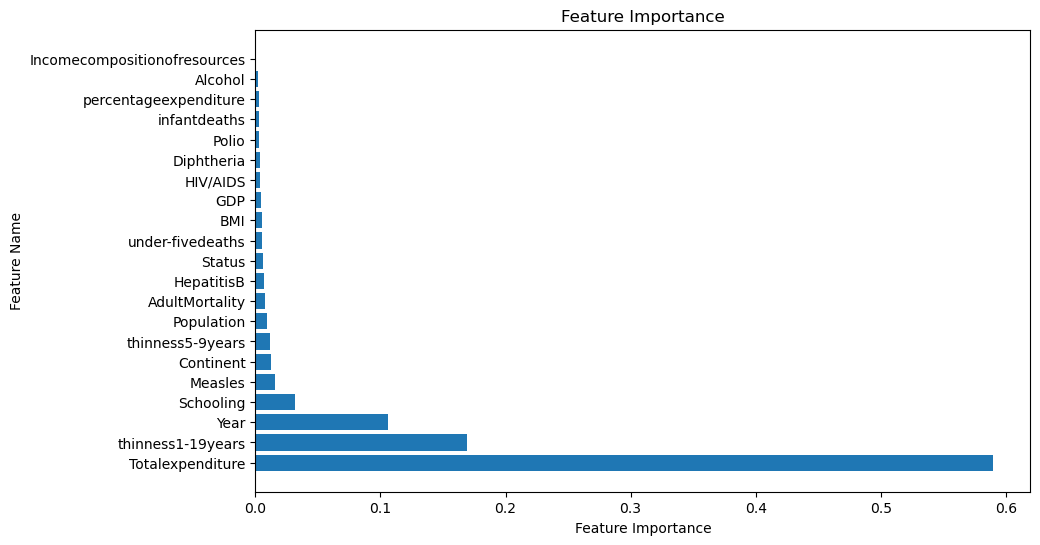

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance')
plt.show()

In [65]:
model_name=[]
r2score=[]
rmse=[]
models=[
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42)
]

for model in models:
    model.fit(X_1 , y_train)
    y_pred = model.predict(X_1_test)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( y_test , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( y_test , y_pred,squared=False )))

In [66]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df=models_df.sort_values("R2_score", ascending = False)

In [67]:
models_df

,Model-Name,R2_score,RMSE
2,ExtraTreesRegressor,97.445905,1.486526
0,RandomForestRegressor,96.776851,1.669914
5,XGBRegressor,96.690328,1.692179
4,DecisionTreeRegressor,92.526252,2.542864
3,AdaBoostRegressor,90.017265,2.938858
1,LinearRegression,86.003703,3.479850


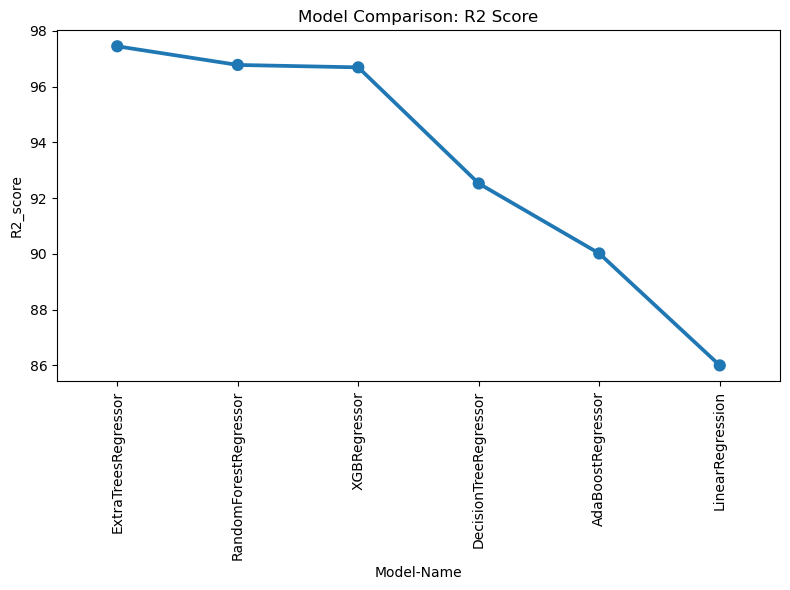

In [68]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model-Name',y='R2_score',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()

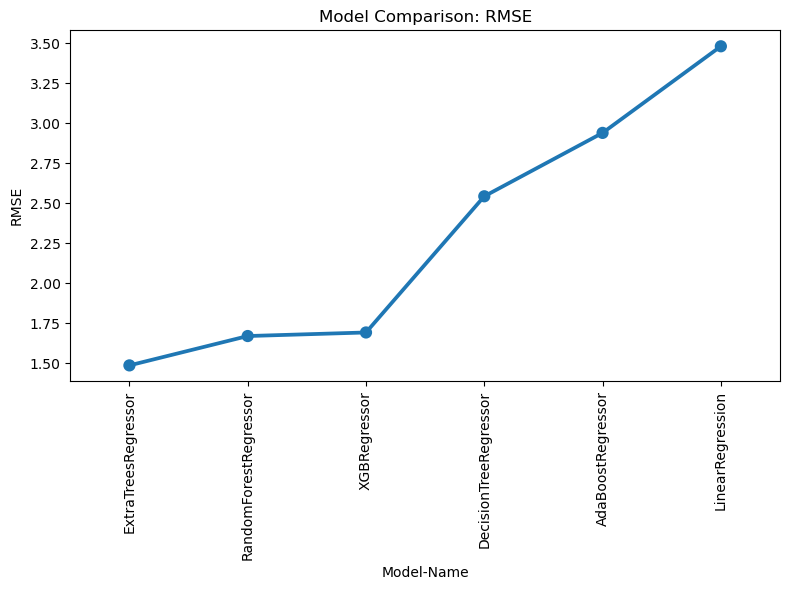

In [69]:
plt.figure(figsize=(8,6))
plt.xlabel('Model Comparison : RMSE')
sns.pointplot(x='Model-Name',y='RMSE',data=models_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()